In [101]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
# Read in the team codes and teaam wins by season data for use in plots
csv_path = "Cleaned_Data/team_codes_and_names.csv"
nba_team_names_df = pd.read_csv(csv_path)

del nba_team_names_df['Unnamed: 0']
#Convert Team Code to uppercase.
nba_team_names_df["Team Code"] = nba_team_names_df['Team Code'].str.upper()
nba_team_names_df

,Team Code,Team Name
0,ATL,Atlanta Hawks
1,BOS,Boston Celtics
2,BRK,Brooklyn Nets
3,CHI,Chicago Bulls
4,CHO,Charlotte Hornets
5,CLE,Cleveland Cavaliers
6,DAL,Dallas Mavericks
7,DEN,Denver Nuggets
8,DET,Detroit Pistons
9,GSW,Golden State Warriors


In [103]:
# Reference to the team wins CSV and read the CSV into DataFrame
csv_path = "Raw_Data/NBA Team Wins.csv"
nba_wins_df = pd.read_csv(csv_path)

# Drop columns that are not needed, and Nan rows
nba_wins_df.drop('Rank', axis = 1, inplace = True)
nba_wins_df.dropna(how = 'any', inplace = True)
nba_wins_df.set_index('Season',inplace = True)
#Transpose the dtaframe
# nba_wins_df = nba_wins_df.T
nba_wins_df = nba_wins_df.reset_index()
nba_wins_df = nba_wins_df.sort_values("Season", ascending=True)
nba_wins_df

,Season,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
4,2014-15,60.0,40.0,38.0,50.0,33.0,53.0,50.0,30.0,32.0,...,45.0,25.0,18.0,39.0,51.0,29.0,55.0,49.0,38.0,46.0
3,2015-16,48.0,48.0,21.0,42.0,48.0,57.0,42.0,33.0,44.0,...,55.0,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0
2,2016-17,43.0,53.0,20.0,41.0,36.0,51.0,33.0,40.0,37.0,...,47.0,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0
1,2017-18,24.0,55.0,28.0,27.0,36.0,50.0,24.0,46.0,39.0,...,48.0,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0
0,2018-19,29.0,49.0,42.0,22.0,39.0,19.0,33.0,54.0,41.0,...,49.0,42.0,51.0,19.0,53.0,39.0,48.0,58.0,50.0,32.0


In [104]:
#Find the teams with the top 5 total number of wins over the past 5 seasons
nba_sum_wins_sorted_df = nba_wins_df.set_index('Season')
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.sum()
nba_sum_wins_sorted_df = pd.DataFrame(nba_sum_wins_sorted_df.sort_values(ascending = False))
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.reset_index()
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.rename(columns={'index':'Team Code', 0: 'Total Wins'})

# Merge in the team names joining by Team code
nba_sum_wins_sorted_df = pd.merge(nba_sum_wins_sorted_df, nba_team_names_df, on='Team Code', how='outer')

nba_sum_wins_sorted_df


,Team Code,Total Wins,Team Name
0,GSW,322.0,Golden State Warriors
1,SAS,278.0,San Antonio Spurs
2,TOR,273.0,Toronto Raptors
3,HOU,270.0,Houston Rockets
4,LAC,250.0,LA Clippers
5,BOS,245.0,Boston Celtics
6,OKC,244.0,Oklahoma City Thunder
7,POR,238.0,Portland Trail Blazers
8,CLE,230.0,Cleveland Cavaliers
9,UTA,227.0,Utah Jazz


In [105]:
#Find the teams with the top 5 average number of wins over the past 5 seasons
nba_mean_wins_sorted_df = nba_wins_df.mean()
nba_mean_wins_sorted_df = nba_wins_df.mean().sort_values(ascending = False)
nba_mean_wins_sorted_df = pd.DataFrame(nba_mean_wins_sorted_df)
nba_mean_wins_sorted_df = nba_mean_wins_sorted_df.reset_index()
nba_mean_wins_sorted_df = nba_mean_wins_sorted_df.rename(columns={"index":'Team Code', 0: 'Mean Wins'})
nba_mean_wins_sorted_df.head()


,Team Code,Mean Wins
0,GSW,64.4
1,SAS,55.6
2,TOR,54.6
3,HOU,54.0
4,LAC,50.0


In [117]:
nba_mean_wins_sorted_df

,Team Code,Mean Wins
0,GSW,64.4
1,SAS,55.6
2,TOR,54.6
3,HOU,54.0
4,LAC,50.0
5,BOS,49.0
6,OKC,48.8
7,POR,47.6
8,CLE,46.0
9,UTA,45.4


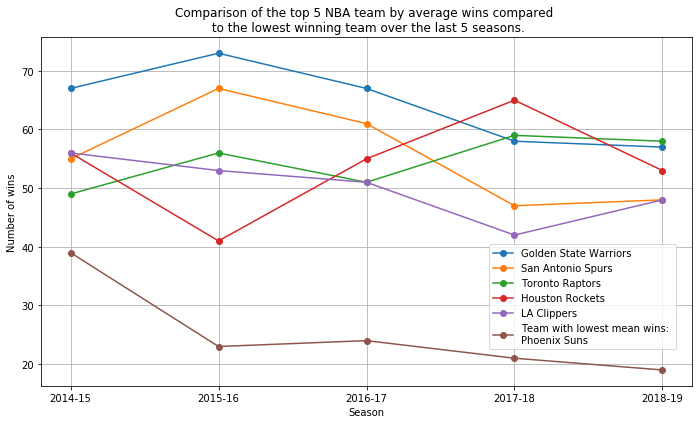

In [136]:
x_axis = nba_wins_df['Season']

y_axis_GSW = nba_wins_df['GSW']
y_axis_SAS = nba_wins_df['SAS']
y_axis_TOR = nba_wins_df['TOR']
y_axis_HOU = nba_wins_df['HOU']  
y_axis_LAC = nba_wins_df['LAC']

y_axis_PHO = nba_wins_df['PHO']

plt.figure(figsize=(10,6))

GSW, = plt.plot(x_axis,y_axis_GSW, marker = 'o', label = 'Golden State Warriors')
SAS, = plt.plot(x_axis,y_axis_SAS, marker = 'o', label = 'San Antonio Spurs')
TOR, = plt.plot(x_axis,y_axis_TOR, marker = 'o', label = 'Toronto Raptors')
HOU, = plt.plot(x_axis,y_axis_HOU, marker = 'o', label = 'Houston Rockets')
LAC, = plt.plot(x_axis,y_axis_LAC, marker = 'o', label = 'LA Clippers')

PHO, = plt.plot(x_axis,y_axis_PHO, marker = 'o', label = 'Team with lowest mean wins: \nPhoenix Suns')

plt.title('Comparison of the top 5 NBA team by average wins compared \n to the lowest winning team over the last 5 seasons.')
plt.xlabel('Season')
plt.ylabel('Number of wins')

plt.grid()
plt.legend(loc = 'upper left',bbox_to_anchor =(0.68,0.42))
plt.tight_layout()
plt.savefig("Plots/Top5TeamsMeantoLowestMeanComparison.png")
plt.show()

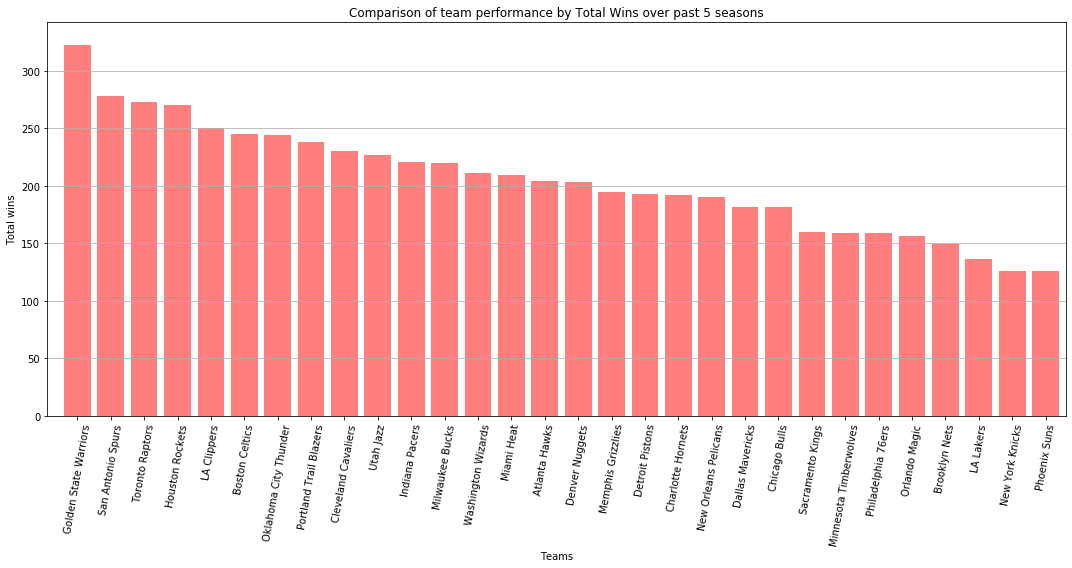

In [114]:
# Set x axis and tick locations
x_axis = np.arange(len(nba_sum_wins_sorted_df))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,8))
plt.bar(x_axis, nba_sum_wins_sorted_df["Total Wins"], color='r', alpha=0.5, align="edge")

plt.xticks(tick_locations, nba_sum_wins_sorted_df["Team Name"], rotation= 80)

# Set Title and labels
plt.title("Comparison of team performance by Total Wins over past 5 seasons")
plt.xlabel("Teams")
plt.ylabel("Total wins")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(nba_sum_wins_sorted_df["Total Wins"])+20)

# Show horizontal grid lines for better clarity
axes = plt.gca()
axes.yaxis.grid()

plt.tight_layout()

# Save the figure and show it
plt.savefig("Plots/TotalTeamWinsComparison.png")
plt.show()

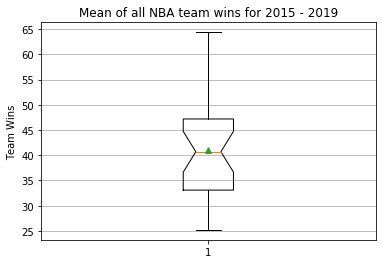

The lower quartile of team wins is: 33.1
The upper quartile of team wins is: 47.2
The interquartile range of team wins is: 14.100000000000001
The median of team wins is: 40.7 
Values below 11.95 could be outliers.
Values above 68.35000000000001 could be outliers.


In [138]:
# The second example again looks at the LAX temperature data set and computes quantiles
#temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
#teamwins = nba_sum_wins_sorted_df['Total Wins']
meanteamwins = nba_mean_wins_sorted_df['Mean Wins']

fig1, ax1 = plt.subplots()
ax1.set_title('Mean of all NBA team wins for 2015 - 2019')
ax1.set_ylabel('Team Wins')
# Show horizontal grid lines for better clarity
axes = plt.gca()
axes.yaxis.grid()

ax1.boxplot(meanteamwins,showmeans=True,notch = True)
plt.savefig("Plots/BoxplotofMeanWins.png")
plt.show()

# Quartile calculations
quartiles = meanteamwins.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of team wins is: {lowerq}")
print(f"The upper quartile of team wins is: {upperq}")
print(f"The interquartile range of team wins is: {iqr}")
print(f"The median of team wins is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

